In [12]:
import pandas as pd
import numpy as np
from embedding import embedding
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_parquet("data/preprocessed_data.parquet")
X = embedding(data,"abstract", "word2vec")

In [14]:
WCSS=[]
for i in range(2,20):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(X)
  print(i, silhouette_score(X, kmeans.labels_))
  unique, counts = np.unique(kmeans.labels_, return_counts=True)
  print(counts)
  WCSS.append(kmeans.inertia_)
# with kmeans and silhouette score the optimal number of cluster is 5 but 6 is not far enough


2 0.577168543542359
[ 2907 10393]
3 0.57289802546209
[10278  3020     2]
4 0.47946930809418226
[6842 4368 1976  114]
5 0.5862275805166738
[3528 9177  145    2  448]
6 0.537518799622544
[ 428 1410  117    2 4684 6659]
7 0.5186813987169375
[4501  754 2465    2  110 5054  414]
8 0.5178387316174871
[ 414 2610 4158    2   49  938  134 4995]
9 0.5175837220075854
[4446 1571   49 3030    2 3174  528  404   96]
10 0.5145381161127075
[2916  185  405 4864   46    2 1160    1 3718    3]
11 0.5026990924002737
[1311 2056   96 2182    2 3455  500  403 3245   49    1]
12 0.503534461000076
[2126 3379    2   69  403 3245 1206   48  188    1 2056  577]
13 0.5125372152818339
[1756 2541   71  200 1135  403    3    2  593 3019 2407   46 1124]
14 0.5058143614161379
[3075  211   46  394 2288    2    1   78 1140    3  610 3459 1984    9]
15 0.5146687405095096
[2422  177  380 1136    2 1143   46 2578  570    2 1731 3021    3   21
   68]
16 0.5112465820970205
[3028   46 1514  868    2 2861 2418 1505   66  438  1

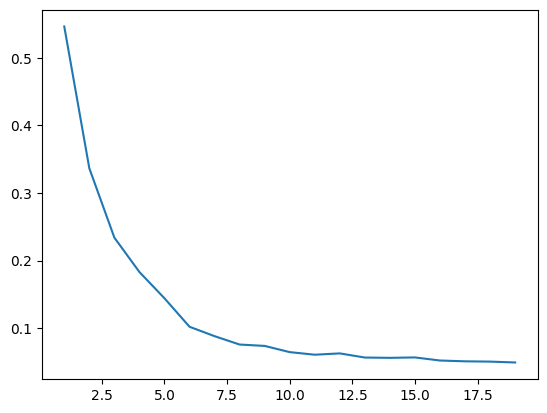

In [4]:
plt.plot(range(1,20),WCSS)
# 6 is the optimal number of clusters by elbow method with k means

In [8]:
from sklearn.cluster import DBSCAN

In [31]:

for i in [0.01, 0.005, 0.001, 0.0005]:
    for j in [25,30,35,40]:
        clustering = DBSCAN(eps=i, min_samples=j)
        clustering.fit(X)
        print(i,j)
        print(silhouette_score(X, clustering.labels_))
        unique, counts = np.unique(clustering.labels_, return_counts=True)
        print(counts)

0.01 25
0.7702602566899374
[  149 13151]
0.01 30
0.7702602566899374
[  149 13151]
0.01 35
0.7702602566899374
[  149 13151]
0.01 40
0.7702602566899374
[  149 13151]
0.005 25
0.6424541558874018
[  243 12844   168    45]
0.005 30
0.6424541558874018
[  243 12844   168    45]
0.005 35
0.6424541558874018
[  243 12844   168    45]
0.005 40
0.6424541558874018
[  243 12844   168    45]
0.001 25
0.6337471327633718
[  324 12757    52   167]
0.001 30
0.6343834952379086
[  333 12748    52   167]
0.001 35
0.6344506816696673
[  334 12747    52   167]
0.001 40
0.6346453383638075
[  337 12744    52   167]
0.0005 25
0.5648147883364221
[  364 12682   167    41    46]
0.0005 30
0.5622433836869007
[  392 12665   167    30    46]
0.0005 35
0.6379498663460004
[  433 12654   167    46]
0.0005 40
0.6387769540995131
[  450 12637   167    46]


In [27]:
unique, counts = np.unique(clustering.labels_, return_counts=True)

In [28]:
counts

array([  243, 12844,   168,    45], dtype=int64)

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
clustering = AgglomerativeClustering(6,linkage="ward")
clustering.fit(X)

AgglomerativeClustering(n_clusters=6)

In [39]:
for i in range(2,10):
  clustering = AgglomerativeClustering(n_clusters = i,linkage="ward")
  clustering.fit(X)
  print(i, silhouette_score(X, clustering.labels_))
  unique, counts = np.unique(clustering.labels_, return_counts=True)
  print(counts)
  

2 0.5487488130780224
[3806 9494]
3 0.5437523018574665
[9494  146 3660]
4 0.5845869758170402
[ 146 9088 3660  406]
5 0.5851531009185981
[9088  144 3660  406    2]
6 0.46223254575819944
[3660  144 4976  406    2 4112]
7 0.49474682223855415
[ 144 3085 4976  406    2 4112  575]
8 0.4969903955094476
[3085   49 4976  406    2 4112  575   95]
9 0.502997239030935
[4976   49  575  406    2 4112 1205   95 1880]


In [35]:
print(silhouette_score(X, clustering.labels_))

0.46223254575819944
